## Grand Mesa Demo

Process ATL03 data from the Grand Mesa, CO region and produce a customized ATL06 dataset.

### What is demonstrated

* The `icesat2.atl06p` API is used to perform a SlideRule parallel processing request of the Grand Mesa region
* The `icesat2.cmr` and `icesat2.h5` API's are used to manually retrieve specific ATL06 datasets corresponding to the Grand Mesa region
* The `pyproj` and `shapely` packages are used to subset ATL06 data that was manually retrieved
* The `matplotlib` and `cartopy` packages are used to plot the data processed by SlideRule alongside the manually retrieved and subsetted data

### Points of interest

The resulting datasets plotted at the bottom of the notebook show that existing ATL06 data is not available for the entire Grand Mesa region.  By using the SlideRule API to process ATL03 data and produce a customized ATL06 dataset, elevation data can be returned for the entire region of interest.

In [1]:
import sys
import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
from datetime import datetime
from shapely.geometry import Polygon, Point
from sliderule import icesat2

## SlideRule Configuration

In [2]:
# Configure Logging
icesat2_logger = logging.getLogger("sliderule.icesat2")
icesat2_logger.setLevel(logging.INFO)
# Create Console Output
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
icesat2_logger.addHandler(ch)

In [3]:
# Configure ICESat-2 API
icesat2.init("icesat2sliderule.org", verbose=False)

## Specify Region of Interest
Can specify coordinates manually or using a geojson

In [4]:
# Specify Region of interest from coordinates
region = [ {"lon": -108.3435200747503, "lat": 38.89102961045247},
           {"lon": -107.7677425431139, "lat": 38.90611184543033}, 
           {"lon": -107.7818591266989, "lat": 39.26613714985466},
           {"lon": -108.3605610678553, "lat": 39.25086131372244},
           {"lon": -108.3435200747503, "lat": 38.89102961045247} ]

In [5]:
# Specify region of interest from geojson
poly_fn = 'grand_mesa_poly.geojson'
region = icesat2.toregion(poly_fn)
region

[{'lon': -108.31168256553767, 'lat': 39.13757646212944},
 {'lon': -108.17287000970857, 'lat': 39.15920066396116},
 {'lon': -108.04939480098754, 'lat': 39.139504663354245},
 {'lon': -107.78724142490994, 'lat': 39.195630349659986},
 {'lon': -107.72839858755752, 'lat': 39.01510930230633},
 {'lon': -107.98560510494981, 'lat': 38.9439912011017},
 {'lon': -108.07460164311031, 'lat': 38.8475137825863},
 {'lon': -108.20772968780051, 'lat': 38.8232055291981},
 {'lon': -108.2878686387796, 'lat': 38.89051431295789},
 {'lon': -108.34115668325224, 'lat': 39.03758987613325},
 {'lon': -108.31168256553767, 'lat': 39.13757646212944}]

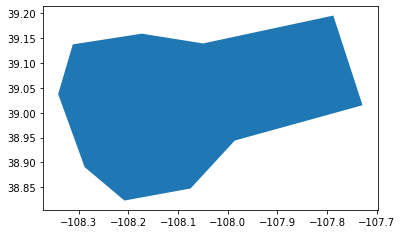

In [6]:
#Read geojson with geopandas
pregion = gpd.read_file(poly_fn)
pregion.plot();

In [7]:
#Get Shapely Polygon geometry object
#pregion.squeeze()
region = []
for i in list(pregion.squeeze().exterior.coords):
    region.append({"lon":i[0], "lat":i[1]})
region

[{'lon': -108.31168256553767, 'lat': 39.13757646212944},
 {'lon': -108.34115668325224, 'lat': 39.03758987613325},
 {'lon': -108.2878686387796, 'lat': 38.89051431295789},
 {'lon': -108.20772968780051, 'lat': 38.8232055291981},
 {'lon': -108.07460164311031, 'lat': 38.8475137825863},
 {'lon': -107.98560510494981, 'lat': 38.9439912011017},
 {'lon': -107.72839858755752, 'lat': 39.01510930230633},
 {'lon': -107.78724142490994, 'lat': 39.195630349659986},
 {'lon': -108.04939480098754, 'lat': 39.139504663354245},
 {'lon': -108.17287000970857, 'lat': 39.15920066396116},
 {'lon': -108.31168256553767, 'lat': 39.13757646212944}]

In [8]:
#Prepare coordinate lists for plotting the region of interest polygon
region_lon = [e["lon"] for e in region]
region_lat = [e["lat"] for e in region]
#Create shapely polygon
pregion = Polygon(zip(region_lon, region_lat))

## Specify parameters for ATL06-SR processing

In [9]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

## Calculate ATL06-SR Elevations from ATL03 Photons using SlideRule

In [10]:
# Latch Start Time
perf_start = time.perf_counter()

# Request ATL06 Data
rsps = icesat2.atl06p(parms, "atlas-s3")

# Latch Stop Time
perf_stop = time.perf_counter()

# Build Dataframe of SlideRule Responses
df = pd.DataFrame(rsps)

# Display Statistics
perf_duration = perf_stop - perf_start
print("Completed in {:.3f} seconds of wall-clock time".format(perf_duration))
print("Reference Ground Tracks: {}".format(df["rgt"].unique()))
print("Cycles: {}".format(df["cycle"].unique()))
print("Received {} elevations".format(len(df)))

Identified 64 resources to processing
Allocating 12 workers across 2 processing nodes
unable to process resource ATL03_20190310034426_10950206_003_01.h5: no elements
Results returned for 1 out of 64 resources
unable to process resource ATL03_20190112181620_02340202_003_01.h5: no elements
unable to process resource ATL03_20190209050825_06530206_003_01.h5: no elements
Results returned for 2 out of 64 resources
Results returned for 3 out of 64 resources
unable to process resource ATL03_20181110092841_06530106_003_01.h5: no elements
Results returned for 4 out of 64 resources
Results returned for 5 out of 64 resources
unable to process resource ATL03_20190116180755_02950202_003_01.h5: no elements
Results returned for 6 out of 64 resources
Results returned for 7 out of 64 resources
unable to process resource ATL03_20190413135615_02340302_003_01.h5: no elements
Results returned for 8 out of 64 resources
Results returned for 9 out of 64 resources
Results returned for 10 out of 64 resources
Res

Completed in 19.352 seconds of wall-clock time
Reference Ground Tracks: [ 737  295  211 1156 1179]
Cycles: [1 2 3 4 5 6 7 8]
Received 101906 elevations


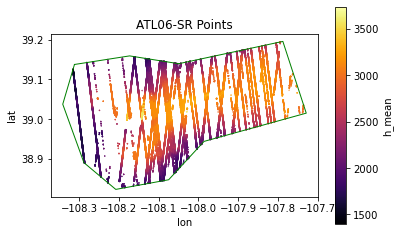

In [11]:
f, ax = plt.subplots()
ax.set_title("ATL06-SR Points")
ax.set_aspect('equal')
df.plot.scatter(ax=ax, x='lon', y='lat', c='h_mean', cmap='inferno', s=0.1)
ax.plot(region_lon, region_lat, linewidth=1, color='g');

## Retrieve Standard ATL06 Elevations using SlideRule
https://nsidc.org/data/atl06

In [12]:
# Latch Start Time
perf_start = time.perf_counter()

# Query ATL06 Files from NASA CMR System
resources = icesat2.cmr(region, short_name='ATL06')

# Look Up for Data Types
atl06_dtypes = {"h_li": "FLOAT", "latitude": "DOUBLE", "longitude": "DOUBLE"}

# Build atl06 dataset
atl06 = {}
for i, resource in enumerate(resources):
    try:
        print("Reading {} of {} at {}: {}".format(i, len(resources), datetime.now().strftime("%Y-%m-%d %H:%M:%S"), resource))
        # Build data dictionary of each element
        for spot in ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]:
            for element in ["h_li", "latitude", "longitude"]:
                datatype = atl06_dtypes[element]
                dataset = spot + "/land_ice_segments/" + element
                if element not in atl06:
                    atl06[element] = []
                atl06[element] += icesat2.h5(dataset, resource, "atlas-s3", datatype).tolist()
    except Exception as e:
        print("Error reading {}: {}".format(resource, e))
       
# Latch Stop Time
perf_stop = time.perf_counter()

# Display Statistics
perf_duration = perf_stop - perf_start
print("\nCompleted in {:.3f} seconds of wall-clock time".format(perf_duration))
print("Received {} elevations".format(len(atl06['h_li'])))

Reading 0 of 64 at 2021-04-07 23:40:30: ATL06_20181017222812_02950102_003_01.h5
Reading 1 of 64 at 2021-04-07 23:40:34: ATL06_20181110092841_06530106_003_01.h5
Reading 2 of 64 at 2021-04-07 23:40:39: ATL06_20181115210428_07370102_003_01.h5
Reading 3 of 64 at 2021-04-07 23:40:43: ATL06_20181213075606_11560106_003_01.h5
Reading 4 of 64 at 2021-04-07 23:40:48: ATL06_20181214194017_11790102_003_01.h5
Reading 5 of 64 at 2021-04-07 23:40:52: ATL06_20190111063212_02110206_003_01.h5
Reading 6 of 64 at 2021-04-07 23:40:56: ATL06_20190112181620_02340202_003_01.h5
Reading 7 of 64 at 2021-04-07 23:41:01: ATL06_20190116180755_02950202_003_01.h5
Reading 8 of 64 at 2021-04-07 23:41:05: ATL06_20190209050825_06530206_003_01.h5
Reading 9 of 64 at 2021-04-07 23:41:11: ATL06_20190214164413_07370202_003_01.h5
Reading 10 of 64 at 2021-04-07 23:41:16: ATL06_20190310034426_10950206_003_01.h5
Error reading ATL06_20190310034426_10950206_003_01.h5: list index out of range
Reading 11 of 64 at 2021-04-07 23:41:16:

In [13]:
#Create Pandas DataFrame
atl06_df = pd.DataFrame(atl06)
atl06_df.shape

(5020438, 3)

In [14]:
# Remove missing data - should probably implement this filter when building dictionary in for loop above
ndv = 3.4028234663852886e+38
atl06_df = atl06_df[atl06_df['h_li'] != ndv]

In [15]:
atl06_df.shape

(4575766, 3)

## Clip ATL06 points to region polygon

In [27]:
#Using geopandas
atl06_gdf = gpd.GeoDataFrame(atl06_df, geometry=gpd.points_from_xy(atl06_df['longitude'], atl06_df['latitude']))
idx = atl06_gdf.within(pregion)

In [28]:
#Using pandas
#atl06_df['geometry'] = [Point(x, y) for x, y in zip(atl06_df['longitude'], atl06_df['latitude'])]
#idx = atl06_df['geometry'].apply(lambda x: x.within(pregion))

In [29]:
atl06_df = atl06_df[idx]
atl06_df.shape

(106428, 4)

## Plot ATL06-SR vs. ATL06

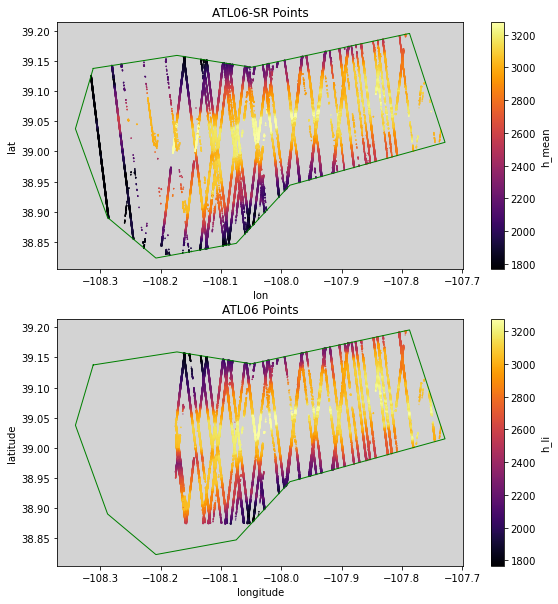

In [30]:
#Set color ramp limits
vmin, vmax = df['h_mean'].quantile((0.02, 0.98))
#Create dictionary of common keyword arguments
plot_kw = {'cmap':'inferno', 's':0.1, 'vmin':vmin, 'vmax':vmax}

f, axa = plt.subplots(2,1, figsize=(10,10)) #sharex=True, sharey=True
axa[0].set_title("ATL06-SR Points")
df.plot.scatter(ax=axa[0], x='lon', y='lat', c='h_mean', **plot_kw)
axa[1].set_title("ATL06 Points")
atl06_df.plot.scatter(ax=axa[1], x='longitude', y='latitude', c='h_li', **plot_kw)

for ax in axa:
    #Plot the region polygon
    ax.plot(region_lon, region_lat, linewidth=1, color='g')
    ax.set_aspect('equal');
    ax.set_facecolor('lightgray')